<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargamos-librerias" data-toc-modified-id="Cargamos-librerias-1">Cargamos librerias</a></span><ul class="toc-item"><li><span><a href="#metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad" data-toc-modified-id="metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad-1.1">metricas de evaluacion (sigmas) + funciones de utilidad</a></span></li><li><span><a href="#Datos-de-entrenamiento!" data-toc-modified-id="Datos-de-entrenamiento!-1.2">Datos de entrenamiento!</a></span></li><li><span><a href="#preprocesamiento-para-X-y-Y" data-toc-modified-id="preprocesamiento-para-X-y-Y-1.3">preprocesamiento para X y Y</a></span></li></ul></li><li><span><a href="#Tensorflow" data-toc-modified-id="Tensorflow-2">Tensorflow</a></span></li><li><span><a href="#Keras" data-toc-modified-id="Keras-3">Keras</a></span><ul class="toc-item"><li><span><a href="#Red-sencillita" data-toc-modified-id="Red-sencillita-3.1">Red sencillita</a></span></li><li><span><a href="#Calidad-de-vida:-liveloss!" data-toc-modified-id="Calidad-de-vida:-liveloss!-3.2">Calidad de vida: liveloss!</a></span></li><li><span><a href="#Calidad-de-vida:-agregando-un-tensorboard" data-toc-modified-id="Calidad-de-vida:-agregando-un-tensorboard-3.3">Calidad de vida: agregando un tensorboard</a></span></li><li><span><a href="#Trucos:-Regularizadores-de-redes" data-toc-modified-id="Trucos:-Regularizadores-de-redes-3.4">Trucos: Regularizadores de redes</a></span></li><li><span><a href="#Actividad:-Crea-una-red-profunda" data-toc-modified-id="Actividad:-Crea-una-red-profunda-3.5">Actividad: Crea una red profunda</a></span></li><li><span><a href="#trucos:-Dropout" data-toc-modified-id="trucos:-Dropout-3.6">trucos: Dropout</a></span></li><li><span><a href="#Trucos:-BatchNormalization-y-Activacion!" data-toc-modified-id="Trucos:-BatchNormalization-y-Activacion!-3.7">Trucos: BatchNormalization y Activacion!</a></span></li><li><span><a href="#Keras-Functional" data-toc-modified-id="Keras-Functional-3.8">Keras Functional</a></span></li><li><span><a href="#Truco:-Skip-connections" data-toc-modified-id="Truco:-Skip-connections-3.9">Truco: Skip connections</a></span></li><li><span><a href="#Optimizador" data-toc-modified-id="Optimizador-3.10">Optimizador</a></span></li><li><span><a href="#Controlando-el-learning-rate" data-toc-modified-id="Controlando-el-learning-rate-3.11">Controlando el learning rate</a></span></li><li><span><a href="#Actividad:-Crea-una-red-poderosa!" data-toc-modified-id="Actividad:-Crea-una-red-poderosa!-3.12">Actividad: Crea una red poderosa!</a></span></li></ul></li><li><span><a href="#Pytorch" data-toc-modified-id="Pytorch-4">Pytorch</a></span></li></ul></div>

![](extra/atlas.png)
# Cargamos librerias

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format='retina' # <-- Gráficas de alta calidad en Jupyter
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import sys

## metricas de evaluacion (sigmas) + funciones de utilidad

![http://i.imgur.com/Hflz2lG.jpg](http://i.imgur.com/Hflz2lG.jpg)

In [5]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

    
def AMSScore(s,b): 
    return np.sqrt (2.*( (s + b + 10.)*np.log(1.+s/(b+10.))-s))

def eval_model(Y_true_train,Y_pred_train,w_train,Y_true_test,Y_pred_test,w_test):
    ratio =  float(len(X_train)) /float(len(X_test))
    TruePositive_train = w_train*(Y_true_train==1.0)*(1.0/ratio)
    TrueNegative_train = w_train*(Y_true_train==0.0)*(1.0/ratio)
    TruePositive_valid = w_test*(Y_true_test==1.0)*(1.0/(1-ratio))
    TrueNegative_valid = w_test*(Y_true_test==0.0)*(1.0/(1-ratio))
    s_train = sum ( TruePositive_train*(Y_pred_train==1.0) )
    b_train = sum ( TrueNegative_train*(Y_pred_train==1.0) )
    s_test = sum ( TruePositive_valid*(Y_pred_test==1.0) )
    b_test = sum ( TrueNegative_valid*(Y_pred_test==1.0) )
    score_train = AMSScore(s_train,b_train)
    score_test = AMSScore(s_test,b_test)
    print('--- Resultados --')
    print('- AUC train: {:.3f} '.format(roc_auc_score(Y_train,Y_train_pred)))
    print('- AUC test : {:.3f} '.format(roc_auc_score(Y_test,Y_test_pred)))
    print('- AMS train: {:.3f} sigma'.format(score_train))
    print('- AMS test : {:.3f} sigma'.format(score_test))
    return score_train, score_test

def plot_roc(clf,Y_test,Y_test_prob):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(clf.__class__.__name__))
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
    plt.legend(loc='lower right')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.tight_layout()
    return

def keras_graph(model):
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Datos de entrenamiento!

Quieres saber mas? Visita

In [9]:
df=pd.read_csv('datos/training.csv')
print(df.shape)
df.head(5)

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


## preprocesamiento para X y Y

In [7]:
Y = df['Label'].replace(to_replace=['s','b'],value=[1,0]).values
weights = df['Weight'].values
X = df.drop(['EventId','Label','Weight'],axis=1).values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,w_train,w_test = train_test_split(X,Y,weights,train_size=0.3)
print(X_train.shape,Y_train.shape,w_train.shape)
print(X_test.shape,Y_test.shape,w_test.shape)

(75000, 30) (75000,) (75000,)
(175000, 30) (175000,) (175000,)


/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Tensorflow
[![](extra/tf_logo.jpg)](https://www.tensorflow.org/)

In [3]:
import tensorflow as tf

# Keras

[![](extra/keras-logo.png)](https://keras.io/)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
import keras

Using TensorFlow backend.


## Red sencillita

In [15]:
K.clear_session() # Limpiar redes anteriores

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu')) # dimensionalidad de los datos 30
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #kernel inicializa los pesos sacados aleatoriamente de una dist. normal
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy']) #métrica para optimizar, optimizador, metric to be reported
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32) # 32 valores por iteración, se hacen 75000/32 iteraciones por época

# Network architecture: 30x42x1 = 1302 neurons

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
75000/75000 [==============================] - 4s 52us/step - loss: 0.5595 - acc: 0.7295
Epoch 2/5
75000/75000 [==============================] - 3s 44us/step - loss: 0.4908 - acc: 0.7598
Epoch 3/5
75000/75000 [==============================] - 3s 44us/step - loss: 0.4775 - acc: 0.7676
Epoch 4/5
75000/75000 [==============================] - 3s 46us/step - loss: 0.4702 - acc: 0.7755
Epoch 5/5
75000/75000 [==============================] - 3s 47us/step - loss: 0.4665 - acc: 0.7776


In [16]:
# Evaluate model
pcut=0.5
Y_train_pred = model.predict(X_train).flatten() > pcut
Y_test_pred = model.predict(X_test).flatten() > pcut
Y_train_prob= model.predict_proba(X_train).flatten()
Y_test_prob = model.predict_proba(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

--- Resultados --
- AUC train: 0.690 
- AUC test : 0.690 
- AMS train: 1.741 sigma
- AMS test : 2.291 sigma


(1.7409776492379045, 2.2912429961717113)

## Calidad de vida: liveloss!

In [12]:
!pip install livelossplot

    100% |████████████████████████████████| 8.9MB 1.5MB/s 
    100% |████████████████████████████████| 389kB 3.2MB/s 
    100% |████████████████████████████████| 163kB 1.8MB/s 
    100% |████████████████████████████████| 133kB 1.9MB/s 
    100% |████████████████████████████████| 163kB 2.0MB/s 
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 122kB 2.2MB/s 
  Running setup.py bdist_wheel for livelossplot ... done
  Stored in directory: /home/hackerman/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
  Running setup.py bdist_wheel for prometheus-client ... done
  Stored in directory: /home/hackerman/.cache/pip/wheels/04/6b/a4/4ccef2edcc797b5553edc6c8bed4d219dafdb019e225c2c348
  Running setup.py bdist_wheel for pandocfilters ... done
  Stored in directory: /home/hackerman/.cache/pip/wheels/39/01/56/f1b08a6275acc59e846fa4c1e1b65dbc1919f20157d9e66c20
  Running setu

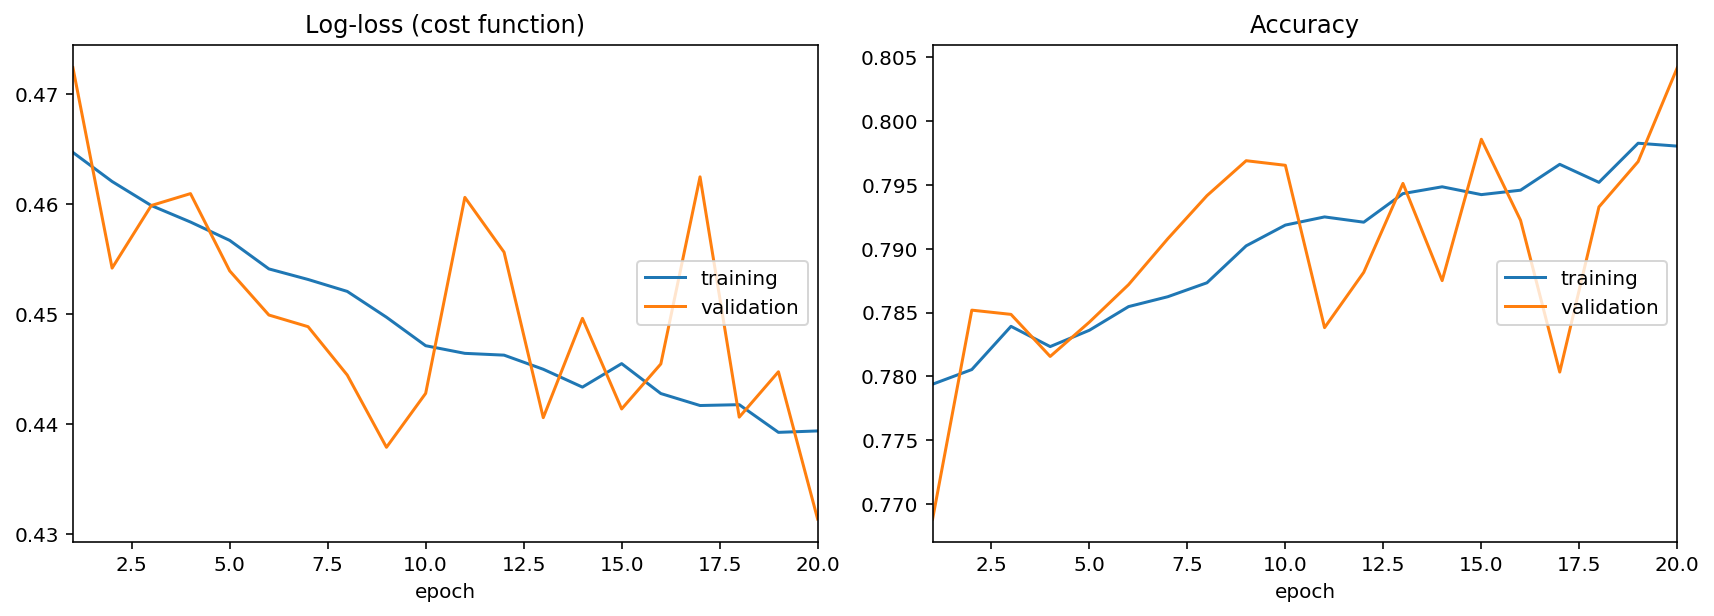

In [17]:
from livelossplot import PlotLossesKeras

model.fit(X_train, Y_train,
          epochs=20, batch_size=32, # le agregamos 5 epochs al modelo ya entrenado
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [19]:
!pip install pydot

    100% |████████████████████████████████| 133kB 2.0MB/s 
  Running setup.py bdist_wheel for pydot ... done
  Stored in directory: /home/hackerman/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.4 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
import pydot

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

### Para correr tensorboard
- Desde terminal: tensorboard --logdir Graph/
- Abrir la dirección generada en localhost

In [24]:
tb_call = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

model.fit(X_train, Y_train, epochs=5, batch_size=32,callbacks=[tb_call])

Epoch 1/5
75000/75000 [==============================] - 3s 42us/step - loss: 0.4384 - acc: 0.7967
Epoch 2/5
75000/75000 [==============================] - 3s 42us/step - loss: 0.4385 - acc: 0.7979
Epoch 3/5
75000/75000 [==============================] - 3s 43us/step - loss: 0.4377 - acc: 0.7997
Epoch 4/5
75000/75000 [==============================] - 3s 43us/step - loss: 0.4377 - acc: 0.7995
Epoch 5/5
75000/75000 [==============================] - 3s 42us/step - loss: 0.4372 - acc: 0.7979


## Trucos: Regularizadores de redes

**L2** pesos mas "equitativos"
**L1** pesos mas "sparse", muchos 0's.

In [25]:
from keras import regularizers

K.clear_session()

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[-1],
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01),
                activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
75000/75000 [==============================] - 4s 52us/step - loss: 20.5357 - acc: 0.6596
Epoch 2/5
75000/75000 [==============================] - 3s 45us/step - loss: 0.7403 - acc: 0.6577
Epoch 3/5
75000/75000 [==============================] - 3s 45us/step - loss: 0.7128 - acc: 0.6576
Epoch 4/5
75000/75000 [==============================] - 3s 44us/step - loss: 0.6870 - acc: 0.6576
Epoch 5/5
75000/75000 [==============================] - 3s 45us/step - loss: 0.6675 - acc: 0.6576


## Actividad: Crea una red profunda

Sugerencias:
* Agrega mas capas
* Hay alguna relacion entre las dimensiones de las capas?
* Como calculas el numero de parametros a entrenar?
* Cual es el efecto del learning rate?

In [32]:
K.clear_session() # Limpiar redes anteriores

model = Sequential()

model.add(Dense(units=10, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu')) # dimensionalidad de los datos es 30

# Hidden layer
model.add(Dense(30, kernel_initializer='normal', activation='relu')) 
model.add(Dense(10, kernel_initializer='normal', activation='relu')) 

# Output layer
# Esta capa es regresión logística, lo que hacen las otras capas es construir/transformar los datos para hacer mejor regresión logística
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #kernel inicializa los pesos sacados aleatoriamente de una dist. normal

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy']) #métrica para optimizar, optimizador, metric to be reported

print(model.summary())
model.fit(X_train, Y_train, epochs=10, batch_size=32) # 32 valores por iteración, se hacen 75000/32 iteraciones por época

# Network architecture: 30x42x1 = 1302 neurons

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
75000/75000 [==============================] - 4s 54us/step - loss: 0.5242 - acc: 0.7350
Epoch 2/10
75000/75000 [==============================] - 4s 51us/step - loss: 0.4825 - acc: 0.7698
Epoch 3/10
75000/75000 [==============================] - 4s 48us/step 

In [33]:
# Evaluate model
pcut=0.7
Y_train_pred = model.predict(X_train).flatten() > pcut
Y_test_pred = model.predict(X_test).flatten() > pcut
Y_train_prob= model.predict_proba(X_train).flatten()
Y_test_prob = model.predict_proba(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

--- Resultados --
- AUC train: 0.702 
- AUC test : 0.702 
- AMS train: 2.364 sigma
- AMS test : 3.123 sigma


(2.364201967687878, 3.12258207411062)

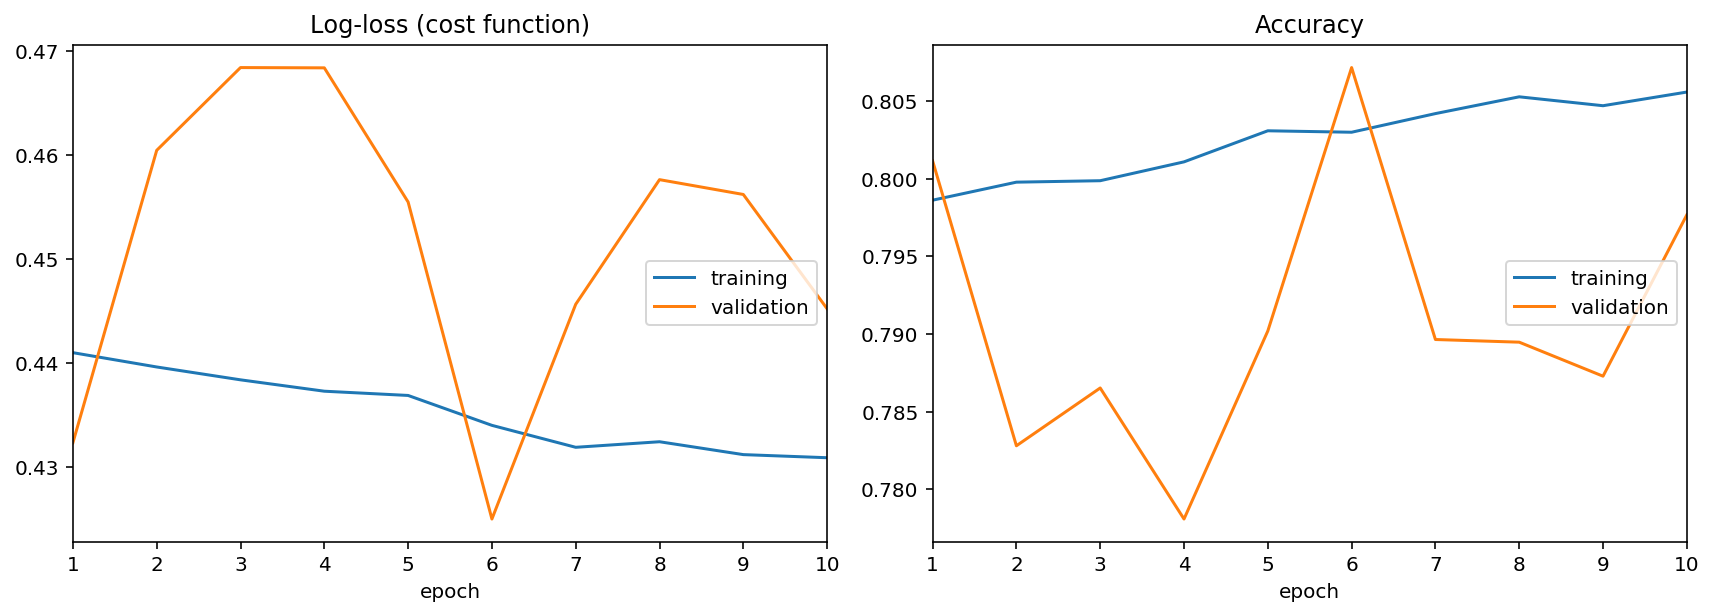

In [31]:
from livelossplot import PlotLossesKeras

model.fit(X_train, Y_train,
          epochs=10, batch_size=32, # le agregamos 5 epochs al modelo ya entrenado
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

## Trucos: Dropout

Matar conexiones de manera aleatoria puede mejorar las conexiones. PARA ESTO ES EL DROPOUT!

- Mas info en https://keras.io/layers/core/
- Lo usamos cuando tenemos muchos parámetros y pocos datos
- Lo usamos para hacer una mejor generalización 

In [34]:
from keras.layers import Dense, Activation, Dropout

K.clear_session()

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2)) # 20% de las conexiones se apagan
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
75000/75000 [==============================] - 4s 52us/step - loss: 0.5654 - acc: 0.6967
Epoch 2/5
75000/75000 [==============================] - 4s 47us/step - loss: 0.5364 - acc: 0.7034
Epoch 3/5
75000/75000 [==============================] - 4s 55us/step - loss: 0.5333 - acc: 0.7043
Epoch 4/5
75000/75000 [==============================] - 3s 46us/step - loss: 0.5281 - acc: 0.7051
Epoch 5

## Trucos: BatchNormalization y Activacion!

Algunas activaciones https://keras.io/layers/advanced-activations/

Batch Normalization https://keras.io/layers/normalization/

In [ ]:
from keras.layers import Dense, Activation, Dropout, BatchNormalization

K.clear_session()

model = Sequential()
model.add(Dense(units=100, input_dim=X_train.shape[-1], kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)

## Keras Functional

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

K.clear_session()

inputs = Input(shape=(X_train.shape[-1],)) # Se usa en lugar de Model Sequential
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
pred = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=pred)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)
pcut=0.5
Y_train_pred = model(X_train).flatten() > pcut
Y_test_pred = model(X_test).flatten() > pcut
Y_train_prob= model(X_train).flatten()
Y_test_prob = model(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

## Truco: Skip connections

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Concatenate

K.clear_session()

inputs = Input(shape=(X_train.shape[-1],))
x1 = Dense(64, activation='relu')(inputs)
x2 = Dense(64, activation='relu')(x1)
skipped = Concatenate()([x1,x2])
pred = Dense(1, activation='sigmoid')(skipped)

model = Model(inputs=inputs, outputs=pred)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=5, batch_size=32)
pcut=0.5
Y_train_pred = model(X_train).flatten() > pcut
Y_test_pred = model(X_test).flatten() > pcut
Y_train_prob= model(X_train).flatten()
Y_test_prob = model(X_test).flatten()
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)
keras_graph(model)


## Optimizador




![](extra/saddle_point_evaluation_optimizers.gif)

Imagenes de Sebastian Ruder (http://ruder.io)

![](extra/beales_20171117_00-02-20_2d.gif)

Imagenes de https://github.com/wassname/viz_torch_optim'


Y hay muchos mas en camino! (http://www.fast.ai/2018/07/02/adam-weight-decay/)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Concatenate
from keras import optimizers

lr = 0.01
K.clear_session()
for opt in [optimizers.SGD(lr=lr),
            optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True),
            optimizers.Adam(lr=lr),
            optimizers.Adagrad(lr=lr)
           ]:
    print('===={}==='.format(str(opt.__class__)))
    inputs = Input(shape=(X_train.shape[-1],))
    x1 = Dense(64, activation='relu')(inputs)
    x2 = Dense(64, activation='relu')(x1)
    skipped = Concatenate()([x1,x2])
    pred = Dense(1, activation='sigmoid')(skipped)
    model = Model(inputs=inputs, outputs=pred)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=5, batch_size=32)
    pcut=0.5
    Y_train_pred = model(X_train).flatten() > pcut
    Y_test_pred = model(X_test).flatten() > pcut
    Y_train_prob= model(X_train).flatten()
    Y_test_prob = model(X_test).flatten()
    eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

## Controlando el learning rate

![image.png](extra/learn_rate.png)

Imagen de [cs231n](http://cs231n.stanford.edu/)

![](extra/lr_finder.png)

![](extra/Lanscape_lr.png)

![](extra/cyclic_lr.png)

* Cyclical Learning Rates for Training Neural Networks (https://arxiv.org/abs/1506.01186)
* Setting the learning rate of your neural network. (https://www.jeremyjordan.me/nn-learning-rate/)
* SNAPSHOT ENSEMBLES: TRAIN 1, GET M FOR FREE (https://arxiv.org/pdf/1704.00109.pdf)
* SGDR: STOCHASTIC GRADIENT DESCENT WITH WARM RESTARTS (https://arxiv.org/pdf/1608.03983.pdf)

In [ ]:
from keras.callbacks import LearningRateScheduler
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 1.0
    lrate = initial_lrate * np.power(drop,  
           np.floor((1+epoch)/epochs_drop))
    return lrate

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks = [loss_history, lrate]


hist = model.fit(X_train, Y_train,
          epochs=5, batch_size=32,callbacks=callbacks)

plt.plot(loss_history.losses,loss_history.lr)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

## Actividad: Crea una red poderosa!

Sugerencias:
* Usa los trucos que vimos
* Cual es el efecto de entrenar con un learning rate bajo, alto?
* Ojo con le optimizador y el learning rate, es super importante!

# Pytorch


[![](extra/pytorch-logo.png)](https://pytorch.org/)



In [ ]:
import torch
from torch.autograd import Variable

In [ ]:
class Net(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 50)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 100)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
net = Net()
opt = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [ ]:
e_losses = []
num_epochs = 5
batch_size=128
for e in range(num_epochs):
    print(e,end='..')
    losses=[]
    for beg_i in range(0, X.shape[0], batch_size):
        x_batch = torch.from_numpy(X)[beg_i:beg_i + batch_size, :]
        y_batch = torch.from_numpy(Y.reshape(-1,1))[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch).float()
        y_batch = Variable(y_batch).float()

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    e_losses.append(np.mean(losses))

plt.plot(e_losses)

### TO DO CHALLENGE:
- Finish working up a neural network model
- Improve: sigma (5 ó 6), accuracy 
- Can use batch normalization, activations, skip, learning rates, 
- Dos categorías a evaluar: Mejor poder predictivo & más creativo
- Enviarlo al correo de la RIIAA
- Subject: Yo tengo el modelo ganador
- Upload to github
- Check Machine Learning Crash Course Google: g.co/mledu/mlcc-riiaa (no certification but usefull when applying)
- Applying Google: Certified skills (competitions, opensource, courses). google.com/students. Proyecto más allá de impacto escolar.

In [35]:
tf.__version__

'1.10.0'